# Q-Learning

The following is an implementation of Q-Learning. The code structure is based on [Deep Lizard's RL course](https://deeplizard.com/course/rlcpailzrd).

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output
from time import sleep

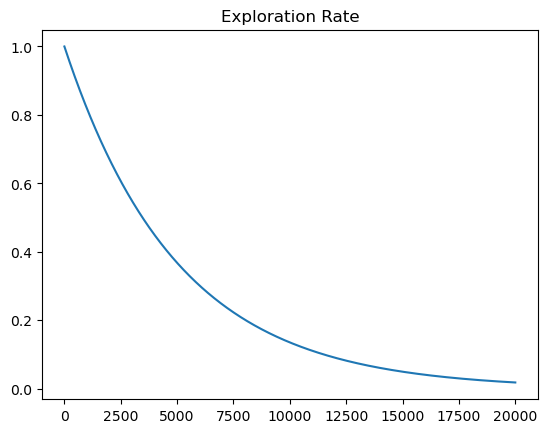

In [2]:
# Parameters

alpha = 0.1 # learning rate
gamma = 0.99 # discount rate

def epsilon(episode):
    """
    Returns the exploration rate given the episode number
    """
    max, min, decay_rate = 1, 0, 0.0002
    return min + (max-min) * np.exp(-decay_rate*episode)

num_episodes = 20000
max_steps = 100 # maximum number of steps per episode

plt.plot([epsilon(i) for i in range(num_episodes)]);
plt.title('Exploration Rate');

In [3]:
# Setting-up Environment and Q-Table

env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True) # what happens if we change is_slippery to true?

num_states = env.observation_space.n
num_actions = env.action_space.n

In [4]:
all_rewards = []

Q = np.zeros((num_states, num_actions)) # initialize Q(s,a) arbitrarily

for episode in range(num_episodes):
    
    episode_reward = 0 # total reward for the current episode
    state = env.reset()
    
    for step in range(max_steps):
        
        if np.random.uniform(0, 1) < epsilon(episode):
            action = env.action_space.sample() # random action
        else:
            action = np.argmax(Q[state,:]) # greedy action
        
        next_state, reward, done, info = env.step(action)
        
        Q[state, action] = Q[state, action] + alpha*(reward + gamma*np.max(Q[next_state,:]) - Q[state, action])
        
        state = next_state
        episode_reward += reward
        
        if done:
            break
        
    all_rewards.append(episode_reward)

In [5]:
Q

array([[0.50212298, 0.4790057 , 0.48218238, 0.48099421],
       [0.27696025, 0.4154469 , 0.3597919 , 0.46571133],
       [0.41919789, 0.43564276, 0.43463861, 0.44367443],
       [0.25541429, 0.37655024, 0.35593585, 0.4332979 ],
       [0.52937799, 0.38374085, 0.43338118, 0.4007471 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.2130777 , 0.2099625 , 0.19701002, 0.16486644],
       [0.        , 0.        , 0.        , 0.        ],
       [0.32021197, 0.37180311, 0.27638287, 0.56383183],
       [0.42546696, 0.62252912, 0.37464969, 0.38228798],
       [0.58127447, 0.46866086, 0.47524939, 0.45216485],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.35436898, 0.48234199, 0.69946306, 0.53790304],
       [0.73056027, 0.87478378, 0.73419416, 0.73580373],
       [0.        , 0.        , 0.        , 0.        ]])

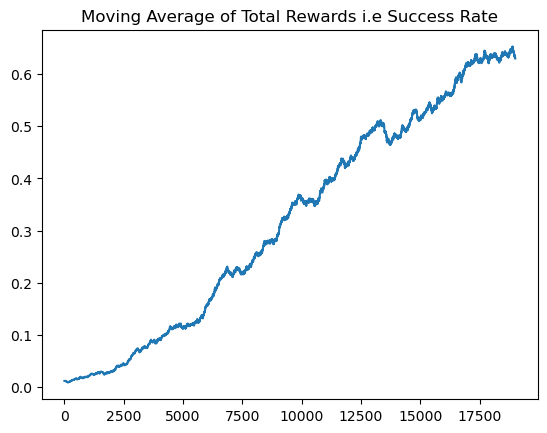

In [6]:
def moving_average(array, n=100):
    """
    Returns the moving average of an array over a window of size n.
    """
    return np.convolve(array, np.ones(n), 'valid')/n

plt.plot(moving_average(all_rewards, 1000));
plt.title('Moving Average of Total Rewards i.e Success Rate');

In [7]:
def play_game(env, Q, max_steps=100):
    """
    Renders policy once on environment. Watch your agent play!

    Parameters
    ----------
    env: gym.core.Environment
        Environment to play on. Must have nS, nA, and P as
        attributes.
    Q: Q-table i.e Q[s,a]
    """
    
    episode_reward = 0
    state = env.reset()
    for t in range(max_steps):
        env.render()
        sleep(0.11)
        action = np.argmax(Q[state])
        state, reward, done, _ = env.step(action)
        episode_reward += reward
        if done:
            break
        clear_output(wait=True)
    env.render()
    if done:
        print(f'Episode reward: {episode_reward}')
    else:
        print(f'Agent did not reach a terminal state in {max_steps} steps')

In [9]:
play_game(env, Q)

  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode reward: 1.0
